In [1]:
import torch
import glob as gb
import numpy as np
from PIL import Image
import os
import random
import torch.nn as nn
import pandas as pd 
import glob as gb

import torchvision.transforms as transforms
import torch.backends.cudnn as cudnn

from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

#from skimage.measure import compare_psnr as psnr
#from skimage.measure import compare_ssim as ssim

from ProGAN_model import Generator

random.seed(1)
np.random.seed(1)

In [2]:
# SR Model Initialization

GPU_IN_USE = torch.cuda.is_available()

if GPU_IN_USE:
    cudnn.benchmark = True
    
device = torch.device('cuda' if GPU_IN_USE else 'cpu')

In [4]:
model_path = '/home/angelo/Desktop/Github/Pytorch_Face_SR/models/ProGANFace_x8.ckpt'

model_checkpoint = torch.load(model_path, map_location = lambda storage, loc: storage.cuda(0))
    
alpha = model_checkpoint['alpha']
step = model_checkpoint['step']

generator = Generator().to(device)
generator.load_state_dict(model_checkpoint['model_state_dict'], strict=False)

<All keys matched successfully>

In [5]:
real_img_path = '/media/angelo/DATEN/Datasets/CelebA/HR/test/'
real_imgs = gb.glob(real_img_path + '*.jpg')

upx2_img_path = '/media/angelo/DATEN/Datasets/CelebA/LR_112/test/'
upx2_imgs = gb.glob(upx2_img_path + '*.jpg')

upx4_img_path = '/media/angelo/DATEN/Datasets/CelebA/LR_56/test/'
upx4_imgs = gb.glob(upx4_img_path + '*.jpg')

In [15]:
img_test = Image.open(real_imgs[2]).resize((28,28), Image.BICUBIC)
img_test = (transforms.ToTensor()(img_test).unsqueeze(0)).to(device)

upsampled = ((generator(img_test, step, alpha)*0.5) + 0.5).squeeze(0)
upsampled.shape

torch.Size([3, 224, 224])

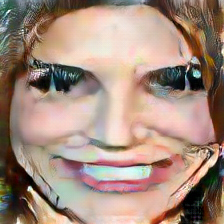

In [16]:
out = upsampled.cpu()
out_img = out.data.numpy()
out_img *= 255.0
out_img = out_img.clip(0, 255)
out_img = out_img.transpose((1,2,0))
out_img = Image.fromarray(np.uint8(out_img), mode='RGB')

out_img